### **Data Description**

**Imports**

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load raw dataset, and set all datatypes to int64**

In [167]:
dataset = pd.read_csv('../broward_data.csv')   # working dataset

### IDENTIFY FEATURES AND TARGETS ###
features = ['person_id','screening_date','sex','race','age_at_current_charge',
            'age_at_first_charge','p_charges','p_incarceration','p_probation',
            'p_juv_fel_count','p_felprop_viol','p_murder','p_felassault',
            'p_misdeassault','p_famviol','p_sex_offense','p_weapon','p_fta_two_year',
            'p_fta_two_year_plus','current_violence','current_violence20',
            'p_pending_charge','p_felony','p_misdemeanor','p_violence',
            'total_convictions','p_arrest','p_property','p_traffic','p_drug','p_dui',
            'p_domestic','p_stalking','p_voyeurism','p_fraud','p_stealing','p_trespass',
            'six_month','one_year','three_year','five_year']
targets = ['general_two_year','general_six_month','drug_two_year','property_two_year',
           'misdemeanor_two_year','felony_two_year','violent_two_year','drug_six_month', 
           'property_six_month','misdemeanor_six_month','felony_six_month',
           'violent_six_month']


# check datatypes
# dataset.dtypes



In [168]:
###GET RID OF STUFF###
# person id isnt helpful
dataset = dataset.drop('person_id', axis=1)
features.remove('person_id')

# screening date also kinda useless
dataset = dataset.drop('screening_date', axis=1)
features.remove('screening_date')

# get rid of race and gender?? (so were not racist and sexist) 
#   (but also disregarding the very real societal implications of race is racist) (so this is something to think about)
dataset = dataset.drop('race', axis=1)
features.remove('race')
dataset = dataset.drop('sex', axis=1)
features.remove('sex')

In [169]:
### MAKE STUFF ###

#make years_since_first_charge
dataset['years_since_first_charge'] = dataset['age_at_current_charge'] - dataset['age_at_first_charge']



**Check data for any glaring issues**

In [170]:
### MISSING DATA ###
# is any data missing? 
missing_vals = dataset.isna().sum().sum()           #num missing values
total_vals = np.product(dataset.shape)              #total num values
pct_missing = (missing_vals / total_vals) * 100     #percent of the data missing
print(f'Percentage of the data missing: {pct_missing}%\n')

### INCORRECT DATA TYPES ###
#make sure these look correct
data_types = dataset.dtypes
print(data_types)

Percentage of the data missing: 0.0%

age_at_current_charge       int64
age_at_first_charge         int64
p_charges                   int64
p_incarceration             int64
p_probation                 int64
p_juv_fel_count             int64
p_felprop_viol              int64
p_murder                    int64
p_felassault                int64
p_misdeassault              int64
p_famviol                   int64
p_sex_offense               int64
p_weapon                    int64
p_fta_two_year              int64
p_fta_two_year_plus         int64
current_violence            int64
current_violence20          int64
p_pending_charge            int64
p_felony                    int64
p_misdemeanor               int64
p_violence                  int64
total_convictions           int64
p_arrest                    int64
p_property                  int64
p_traffic                   int64
p_drug                      int64
p_dui                       int64
p_domestic                  int64
p_stalking

#### **Preliminary Analysis**

##### Histograms

['age_at_current_charge', 'age_at_first_charge', 'p_charges', 'p_incarceration', 'p_probation', 'p_juv_fel_count', 'p_felprop_viol', 'p_murder', 'p_felassault', 'p_misdeassault', 'p_famviol', 'p_sex_offense', 'p_weapon', 'p_fta_two_year', 'p_fta_two_year_plus', 'current_violence', 'current_violence20', 'p_pending_charge', 'p_felony', 'p_misdemeanor', 'p_violence', 'total_convictions', 'p_arrest', 'p_property', 'p_traffic', 'p_drug', 'p_dui', 'p_domestic', 'p_stalking', 'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass', 'six_month', 'one_year', 'three_year', 'five_year']


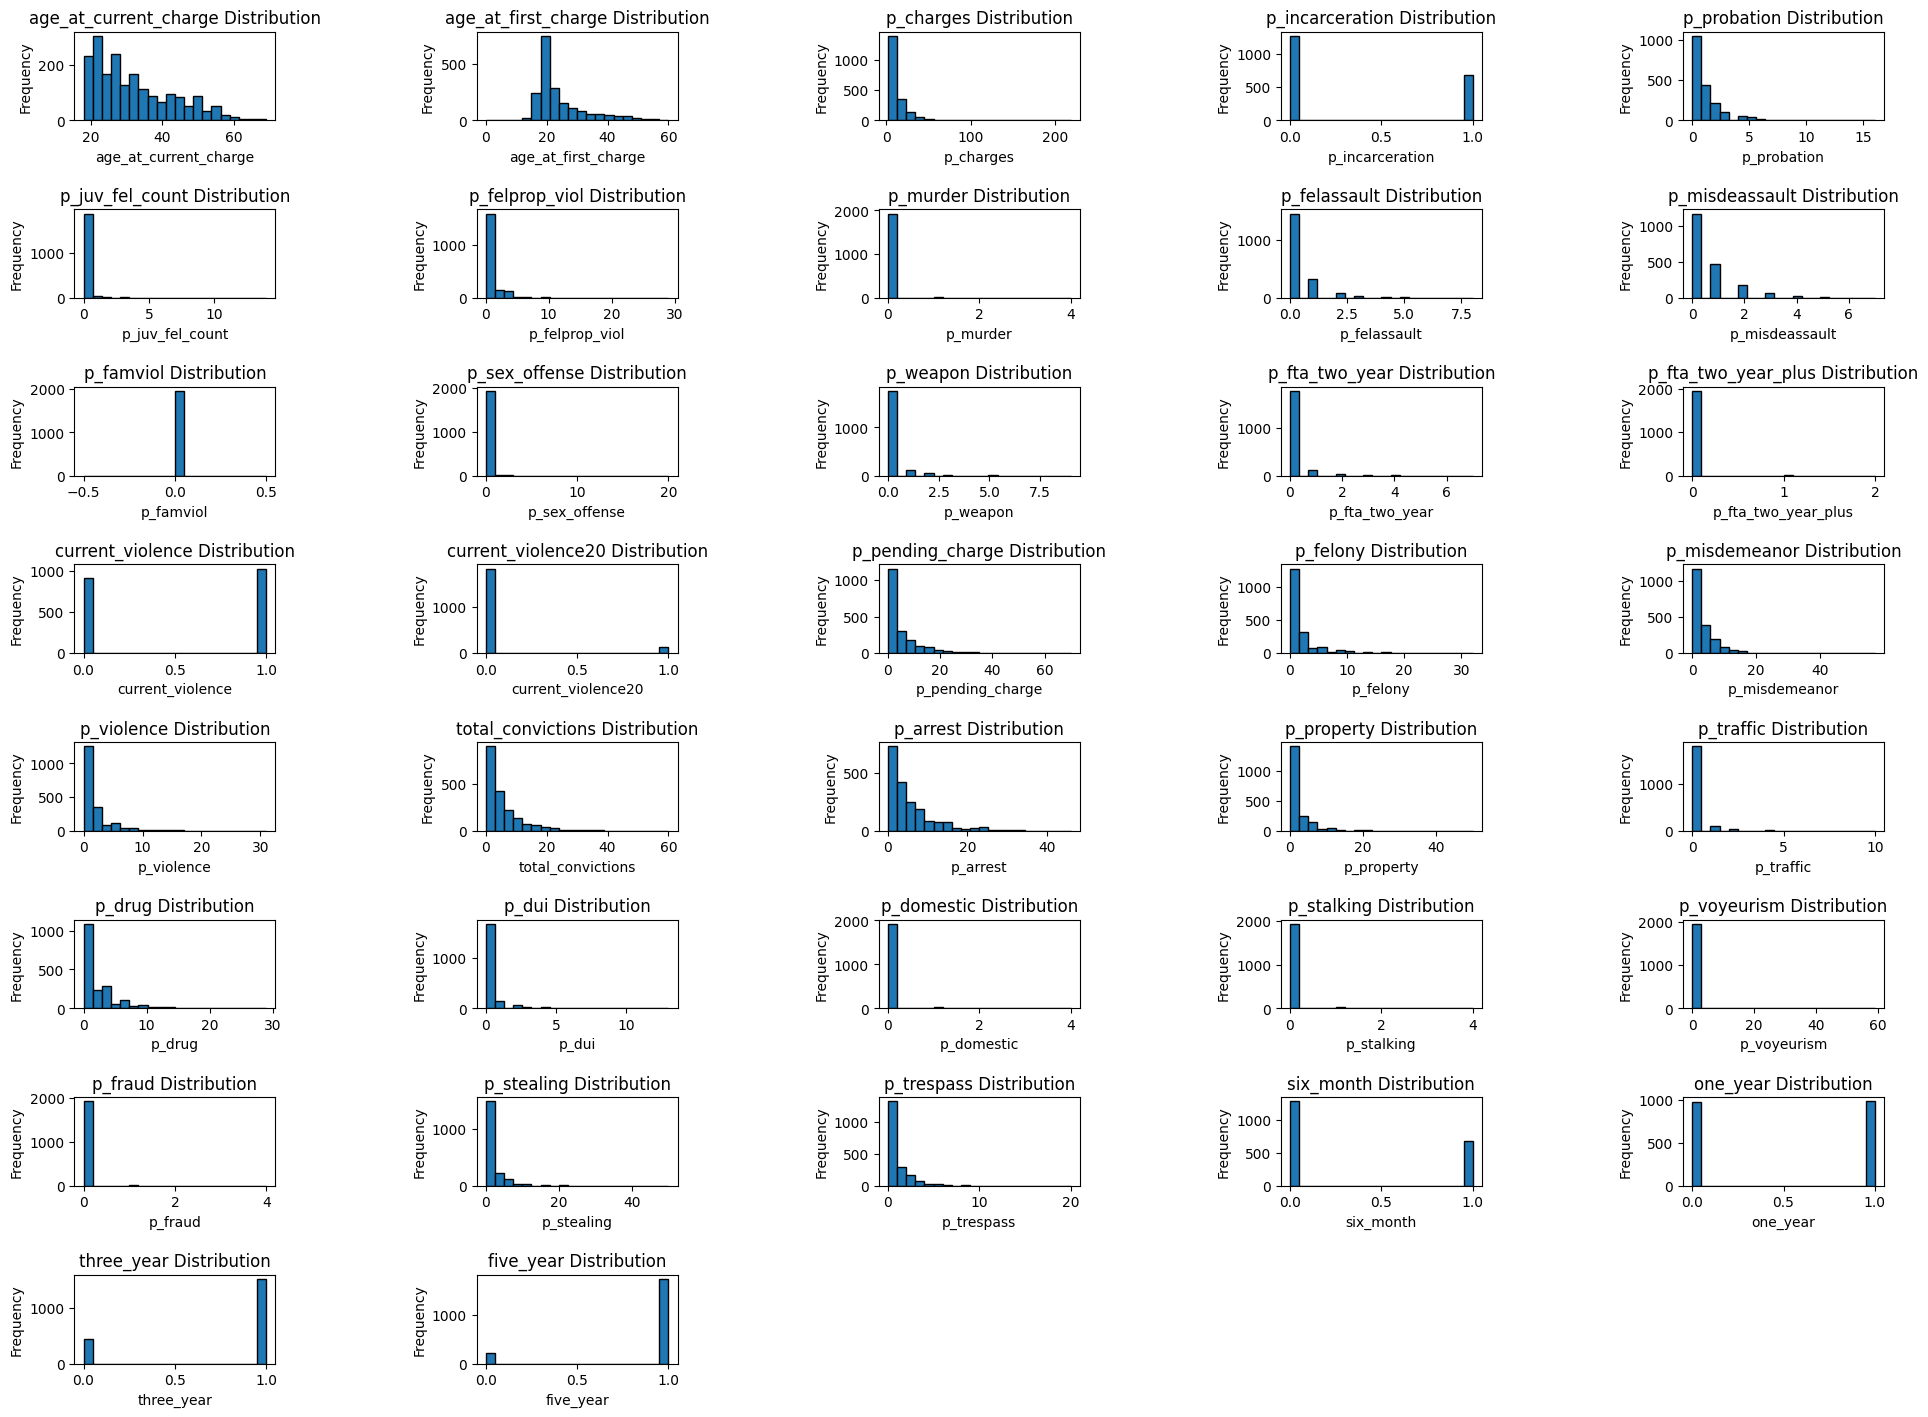

['age_at_current_charge', 'age_at_first_charge', 'p_charges', 'p_incarceration', 'p_probation', 'p_juv_fel_count', 'p_felprop_viol', 'p_murder', 'p_felassault', 'p_misdeassault', 'p_famviol', 'p_sex_offense', 'p_weapon', 'p_fta_two_year', 'p_fta_two_year_plus', 'current_violence', 'current_violence20', 'p_pending_charge', 'p_felony', 'p_misdemeanor', 'p_violence', 'total_convictions', 'p_arrest', 'p_property', 'p_traffic', 'p_drug', 'p_dui', 'p_domestic', 'p_stalking', 'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass', 'six_month', 'one_year', 'three_year', 'five_year']


In [171]:
### HISTOGRAMS ###
# to show distribution of data
# display details
cols=5
rows = (len(features)+cols-1)//cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
print(features)
# loop through features
for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    ax.hist(dataset[feature], bins=20, edgecolor='black')
    ax.set_title(f"{feature} Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

for n in range(i+1, rows*cols):
    fig.delaxes(axes.flatten()[n])

# display
plt.subplots_adjust(hspace=1, wspace=1)
plt.show()
print(features)



In [172]:
# it appears that the variance of feature 'p_famviol' is zero. confirm this:
if dataset['p_famviol'].max() == dataset['p_famviol'].min():
    print("yeah they're all the same")
else: 
    print("nah")


yeah they're all the same


In [173]:
# remove useless feature famviol
dataset = dataset.drop('p_famviol', axis=1)
features.remove('p_famviol')

In [174]:
# it also looks like theres one person who was first charged at age 0:

if((dataset['age_at_first_charge'] == 0).any()):
    print("huh thats weird")
else:
    print("nah")

# how many are there?
count = (dataset['age_at_first_charge'] == 0).sum()
print(f'How many: {count}')


huh thats weird
How many: 1


In [175]:
# remove weird datapoint where that guy was charged at age 0
dataset = dataset[dataset['age_at_first_charge'] != 0]

##### Scatter plots

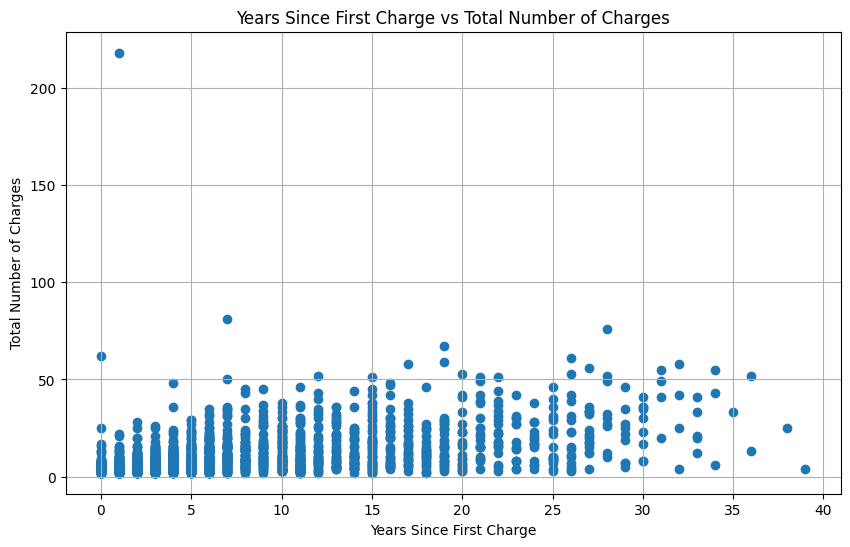

In [176]:
### SCATTER PLOTS ###
# to show relationships between features/targets

# years since first charge vs number of past charges
plt.figure(figsize=(10, 6))
plt.scatter(dataset['years_since_first_charge'], dataset['p_charges'])
plt.title('Years Since First Charge vs Total Number of Charges')
plt.xlabel('Years Since First Charge')
plt.ylabel('Total Number of Charges')
plt.grid(True)
plt.show()

In [177]:
# get rid of that crazy guy getting like 200+ charges in a year
dataset = dataset[dataset['p_charges'] < 200]

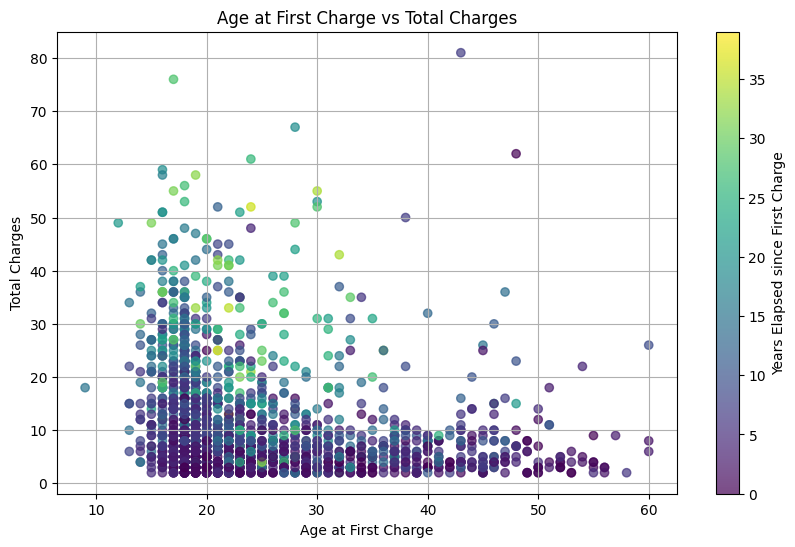

In [178]:
# age at first charge vs previous charges, with color scale for years since first charge
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset['age_at_first_charge'], dataset['p_charges'], c=dataset['years_since_first_charge'], alpha=0.7)
plt.title('Age at First Charge vs Total Charges')
plt.xlabel('Age at First Charge')
plt.ylabel('Total Charges')
plt.grid(True)
cbar = plt.colorbar(scatter, label='Years Elapsed since First Charge')
plt.show()


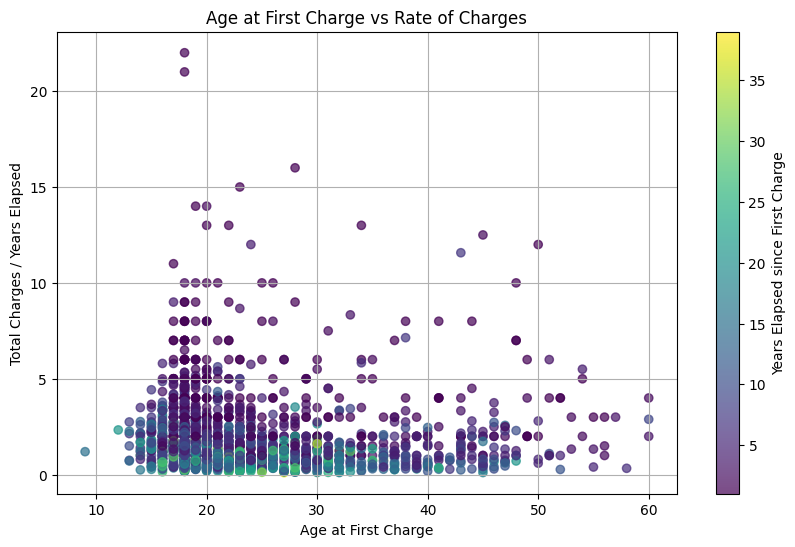

In [179]:
# age at first charge vs rate of charges
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dataset['age_at_first_charge'], dataset['p_charges']/dataset['years_since_first_charge'], c=dataset['years_since_first_charge'], alpha=0.7)
plt.title('Age at First Charge vs Rate of Charges')
plt.xlabel('Age at First Charge')
plt.ylabel('Total Charges / Years Elapsed')
plt.grid(True)
cbar = plt.colorbar(scatter, label='Years Elapsed since First Charge')
plt.show()

**Check for imbalance**

general_two_year
0    1064
1     888
Name: count, dtype: int64
general_two_year
0    0.545082
1    0.454918
Name: count, dtype: float64


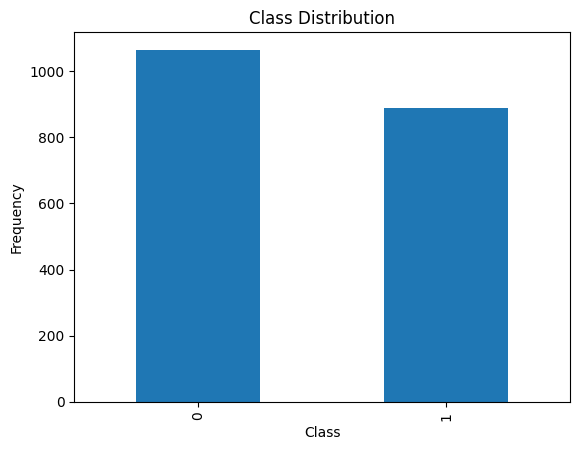

In [180]:
class_counts = dataset['general_two_year'].value_counts()
print(class_counts)

# Proportions
print(class_counts / len(dataset))

# Visual Inspection
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Split into test and training**

In [181]:
X = dataset[features]   # feature values for all rows in cleaned dataset
y = dataset[targets]    # target values for all rows in cleaned dataset

### SPLIT INTO TRAIN AND TEST SETS ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
### .CSV FILES FOR TRAINING AND TESTING ###
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv('cleaned_training.csv', index=False)
test_data.to_csv('cleaned_testing.csv', index=False)

for if u wanna get the features:

In [183]:
#print(features)